In [ ]:
# Import the required libraries
from matplotlib import pyplot as plt
import cv2 as cv2
from google.colab.patches import cv2_imshow
import numpy as np

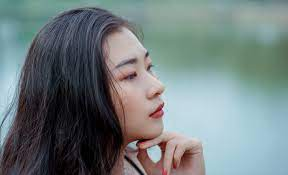

In [ ]:
#import the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/portrait_lady.png')
if img is None:
  print("Error: Could not load image. Please check the file path and ensure the image exists.")
else:
  cv2_imshow(img)


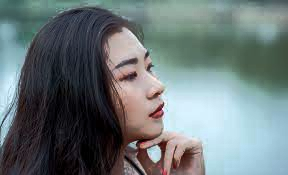

In [ ]:
## Q1 - Enhance the contrast of the image
## Convert to HSV and equalize histogram
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_enhanced = cv2.equalizeHist(hsv[...,2])
hsv[:,:,2] = img_enhanced
new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(new_img)

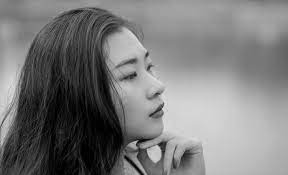

In [ ]:
##convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

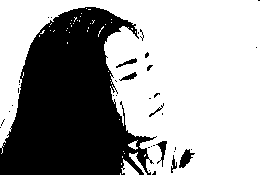

In [ ]:
## Q2 - Extract the mask of the person from the image

result = img_gray.copy()
image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

_, mask = cv2.threshold(hsv[:, :, 2], 90, 255, cv2.THRESH_BINARY)
x, y, w, h = 00, 00, 260, 260

# Crop the image
cropped_img = mask[y:y+h, x:x+w]
cv2_imshow(cropped_img)


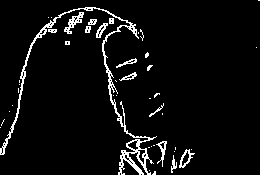

In [ ]:
## Q3A - Extract the edges of just the person using "Only Morphological Operations

# Load the image
result = img_gray.copy()

# Threshold the value channel
_, mask = cv2.threshold(hsv[:, :, 2], 90, 255, cv2.THRESH_BINARY)

# Apply morphological operations (adjust parameters as needed)

#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
kernel = np.ones((3,5),np.uint8)

# Dilate to expand the mask
dilated_mask = cv2.dilate(mask, kernel, iterations=1)

# Subtract the original mask from the dilated mask to get the edges
edges = cv2.subtract(dilated_mask, mask)
#cv2_imshow(edges)

# Assuming you have a bounding box (x, y, w, h)
x, y, w, h = 00, 00, 260, 260

# Crop the image
cropped_img = edges[y:y+h, x:x+w]
cv2_imshow(cropped_img)


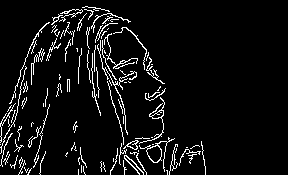

In [ ]:
## Q3B - Extract the edges of just the person using "Standard Edge Detector"
img_canny = cv2.Canny(img, 100, 200)
cv2_imshow(img_canny)

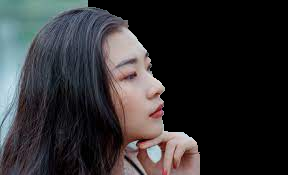

In [ ]:
## Q4 - Use GrabCut (from OpenCV) to segment the given image

# Load the image and define the bounding box
img = img.copy()

# Define an approximate rectangle for the foreground object
rect = (0, 0, 200, 180)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Create the mask and apply GrabCut
mask = np.zeros(img.shape[:2], dtype=np.uint8) # Create an empty mask

# Apply GrabCut
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
output = cv2.bitwise_and(img, img, mask=mask2)
cv2_imshow(output)
